cdflibの説明書
https://cdflib.readthedocs.io/en/latest/introduction.html
akebono cdfについて
分かったこと
・Epochはある基準時刻からの経過時間を記録したもの
　cdflib.cdfepoch.breakdown(epoch, True or False)  #True だとndarray, False だとlistで返す　
　↑のやつで[year, month, day, hour, minute, socond, milisecond]がたくさん入ったListを作れる
・E, BはdBで入っていると思われる。(DARTSにあったときはそうだった)
　The intensities are described in [dB] (0<I<254) where
  0[dB]=10^-6[mV/m] for E-field and 0[dB] = 10^-6[pT] for B-field.
分からないこと
・Eaveの平均の仕方は？　Emaxはどの幅の最大？8sかな？


In [2]:
import cdflib
cdf_file = cdflib.CDF('ak_h1_mca_19890401_v02.cdf')

In [3]:
cdf_file.cdf_info()

{'CDF': PosixPath('/home/www/Document/Akebono_analysis/Akebono_analysis/VLF_mca_cdf/ak_h1_mca_19890401_v02.cdf'),
 'Version': '2.7.2',
 'Encoding': 6,
 'Majority': 'Row_major',
 'rVariables': [],
 'zVariables': ['Emax', 'Eave', 'Bmax', 'Bave', 'PostGap', 'Epoch', 'channel'],
 'Attributes': [{'Acknowledgement': 'Global'},
  {'ADID_ref': 'Global'},
  {'Data_type': 'Global'},
  {'Data_version': 'Global'},
  {'Descriptor': 'Global'},
  {'Discipline': 'Global'},
  {'Generated_by': 'Global'},
  {'Generation_date': 'Global'},
  {'Instrument_type': 'Global'},
  {'Logical_file_id': 'Global'},
  {'Logical_source': 'Global'},
  {'Logical_source_description': 'Global'},
  {'Mission_group': 'Global'},
  {'MODS': 'Global'},
  {'PI_affiliation': 'Global'},
  {'PI_name': 'Global'},
  {'Project': 'Global'},
  {'Rules_of_use': 'Global'},
  {'source_name': 'Global'},
  {'TEXT': 'Global'},
  {'Time_resolution': 'Global'},
  {'TITLE': 'Global'},
  {'Start_time': 'Global'},
  {'End_time': 'Global'},
  {'AVG

In [62]:
cdf_file.globalattsget()

{'Acknowledgement': 'AKEBONO VLF-MCA data were provided by Akebono VLF team through the data archive system at Kanazawa University in Japan.',
 'ADID_ref': 'NSSD0241 ',
 'Data_type': 'H1 > High Resolution data',
 'Data_version': '2',
 'Descriptor': 'MCA > multi channel analyzer',
 'Discipline': 'Space Physics > Magnetospheric Science',
 'Generated_by': 'KANAZAWA University',
 'Generation_date': '20140529',
 'Instrument_type': 'Radio and Plasma Waves(space)',
 'Logical_file_id': 'AK_H1_MCA_19890401_V02',
 'Logical_source': 'AK_H1_MCA',
 'Logical_source_description': 'Akebono Radio and Plasma Waves High Resolution data',
 'Mission_group': 'Akebono',
 'MODS': ' ',
 'PI_affiliation': 'KANAZAWA University',
 'PI_name': 'I. Nagano',
 'Project': ' ',
 'Rules_of_use': ' In order to confirm the reliability of the data, you are requested to contact the VLF PI, Prof. Isamu Nagano before using the VLF-MCA data in oral/poster presentations. In the publishment, you should contact to the VLF PI and c

In [88]:
#実時間に直す部分
epoch = cdf_file.varget('Epoch')
test_breakdown = cdflib.cdfepoch.breakdown(epoch,False)

for i in range(len(test_breakdown)):
    del test_breakdown[i][0:3]
    test_breakdown[i].pop()
    test_breakdown[i] = " ".join(map(str, test_breakdown[i]))
test_breakdown[0:10]

['0 0 4',
 '0 0 12',
 '0 0 20',
 '0 0 28',
 '0 0 36',
 '0 0 44',
 '0 0 52',
 '0 1 0',
 '0 1 8',
 '0 1 16']

IndexError: pop from empty list

In [92]:
cdf_file.varget("channel"), str(3.16e+00)

(array([3.16e+00, 5.62e+00, 1.00e+01, 1.78e+01, 3.16e+01, 5.62e+01,
        1.00e+02, 1.78e+02, 3.16e+02, 5.62e+02, 1.00e+03, 1.78e+03,
        3.16e+03, 5.62e+03, 1.00e+04, 1.78e+04], dtype=float32),
 '3.16')

In [22]:
import numpy as np
import matplotlib.pyplot as plt

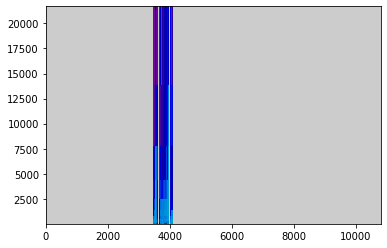

In [95]:
Intensity_of_Eave = cdf_file.varget('Eave') #単位はdB
freq = cdf_file.varget('channel')
time = cdf_file.varget('Epoch')
time = cdflib.cdfepoch.breakdown(time, False) #Falseなのでlist が返される

#timeのyear, month, day, msの部分を削る
year, month, day = str(time[1][0]), str(time[1][1]), str(time[1][2])
for i in range(len(time)):
    del time[i][0:3]
    time[i].pop()
    time[i] = "".join(map(str, time[i]))
    time[i] = int(time[i])

time_test = np.arange(0, len(time))
Time, Freq = np.meshgrid(time_test, freq)

plt.pcolormesh(Time, Freq, Intensity_of_Eave.T, cmap = 'nipy_spectral')

7